# Heart disease Prediction



*   Analysing the dataset and creating report.
*   Creating a machine learning model to predict if the person will have heart disease or not.


## Importing the libraries

In [ ]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
!pip install catboost

# Accessing the dataset

In [ ]:
# Accessing the dataset
data = pd.read_csv("values.csv")
data1 = pd.read_csv("labels.csv")

# Merging the two dataset which is the values and the target data
mydata = pd.merge(data, data1, on = 'patient_id', how='right')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydata

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# It gives number of rows & columns of the dataset

In [ ]:
mydata.shape

(180, 15)

In [ ]:
mydata.size

2700

In [ ]:
mydata.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [ ]:
mydata.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


# Full summary of the dataset

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

# Checking null values in the dataset

In [ ]:
mydata.isnull().sum()

,0
patient_id,0
slope_of_peak_exercise_st_segment,0
thal,0
resting_blood_pressure,0
chest_pain_type,0
num_major_vessels,0
fasting_blood_sugar_gt_120_mg_per_dl,0
resting_ekg_results,0
serum_cholesterol_mg_per_dl,0
oldpeak_eq_st_depression,0


# Gives statistical summary of all numeric columns

In [ ]:
mydata.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# Gives statistical summary of categorical (object-type) columns

In [ ]:
mydata.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


# It counts of each unique category in the column thal

In [ ]:
mydata.thal.value_counts()

,count
thal,
normal,98
reversible_defect,74
fixed_defect,8


# Gives all unique values present in the thal column

In [ ]:
mydata['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [ ]:
mydata

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


This is a heart disease prediction data which is having 2 files


*   labels(Patient ID, Heart disease is there or not)
*   Values(Patient ID, all the features)

After mearging the data sets we came to know that


*   There are in total 180 rows and 15 columns and the data is having a total of 2700 records.
*   There are only 2 categorical features and rest all are numerical features.


*   There are no null values or duplicate values present in the data.

## Exploratory Data Analysis

#Uni Variate Analysis

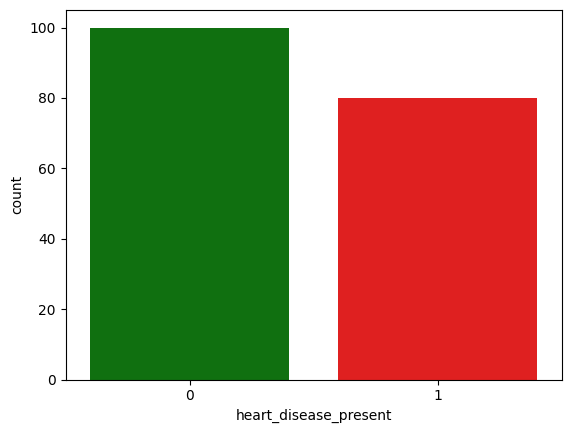

In [ ]:
# Countplot of the heart disease present or not.
sns.countplot(x="heart_disease_present", data=mydata,palette=["Green","Red"])
plt.show()

* Heart disease present is our target column and it is having the data in 0's and 1's. We can apply classification techniques while creating the model.
* This is the count of the heart disease present column where 0 represents not
having heart disease and 1 represents the person is having heart disease.


*   The number of 0's are more than the 1's which mean that the data is having more number of people with not having heart disease.
*   As there is not much difference in the data so we can say that the data is balanced data with no missing values or inproper values.

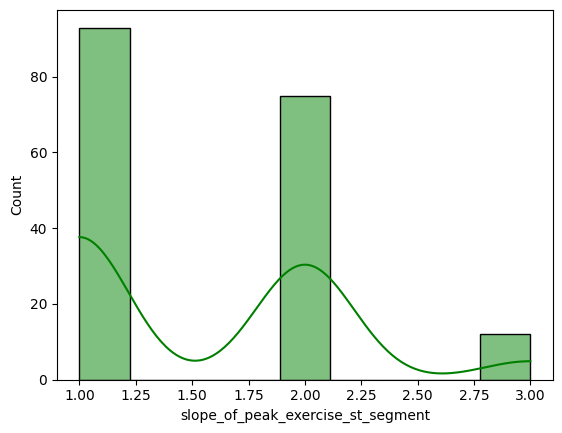

In [ ]:
# Distribution of Peak exercise
sns.histplot(mydata['slope_of_peak_exercise_st_segment'],kde=True,color='green')
plt.show()

Upslopping occurs the most frequently, followed by value Flat, while value Downslopping appears the least.

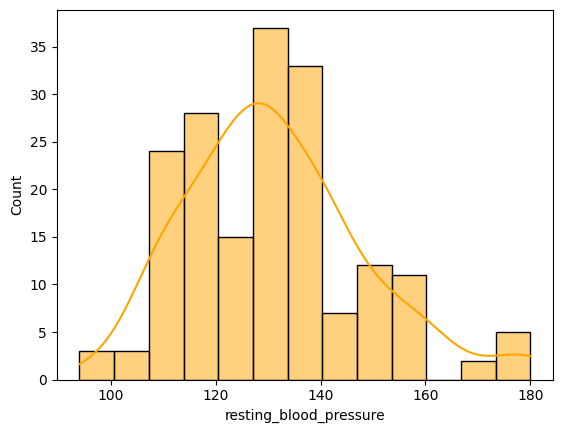

In [ ]:
# Distribution of Resting Blood pressure
sns.histplot(mydata['resting_blood_pressure'],kde=True,color='orange')
plt.show()




*   Most values fall between 110 and 140 mm Hg, with the highest concentration around 120–130 mm Hg, as shown by the tallest bars and peak in the KDE curve.
*   A few patients have very low or very high blood pressure values (above 160–180 mm Hg), indicating some outliers.

*   Overall, the distribution is roughly bell-shaped but slightly right-skewed, suggesting a few patients with higher blood pressure.






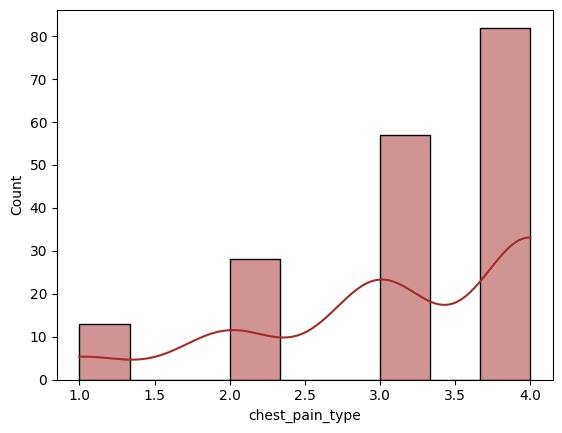

In [ ]:
# Distribution of Chest Pain
sns.histplot(mydata['chest_pain_type'],kde=True,color='brown')
plt.show()

Among the four categories, type 4 chest pain is the most common, followed by type 3 and type 2.
Type 1 chest pain occurs the least frequently.

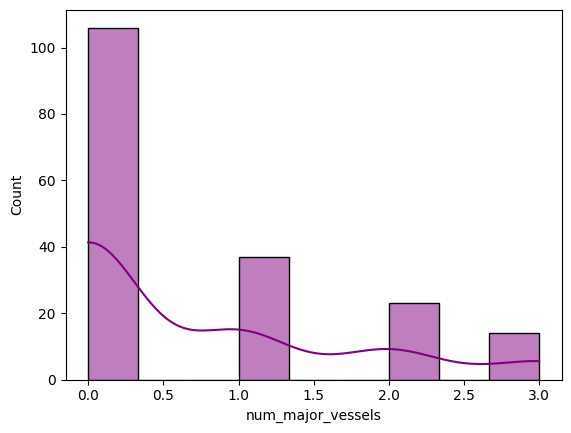

In [ ]:
# Distribution of number of major vessels
sns.histplot(mydata['num_major_vessels'],kde=True,color='purple')
plt.show()

Most patients have 0 major vessels detected, making it the most frequent value by a large margin.
Counts gradually decrease as the number increases to 1, 2, and 3 vessels, showing that fewer patients have higher vessel counts.

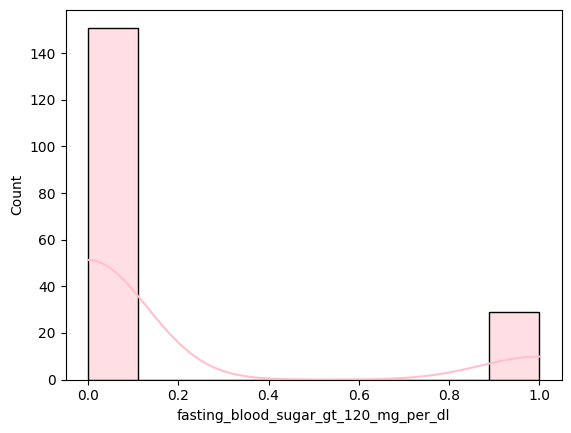

In [ ]:
# Distribution of Fasting blood pressure
sns.histplot(mydata['fasting_blood_sugar_gt_120_mg_per_dl'],kde=True,color='pink')
plt.show()

Most patients have a value of 0, meaning their fasting blood sugar is not above 120 mg/dl.
Only a smaller group has a value of 1, indicating elevated fasting sugar levels.

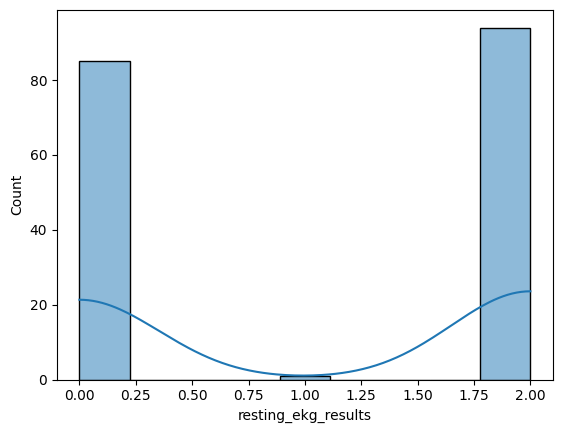

In [ ]:
# Distribution of resting EKG
sns.histplot(mydata['resting_ekg_results'],kde=True)
plt.show()



*   Most patients fall into categories 0 and 2, with counts being fairly similar for both.
*   Category 1 is very rare and appears in only a small number of records.
*   The KDE curve reflects this pattern with two major peaks at 0 and 2, and a dip near 1, showing that the middle category is much less common.





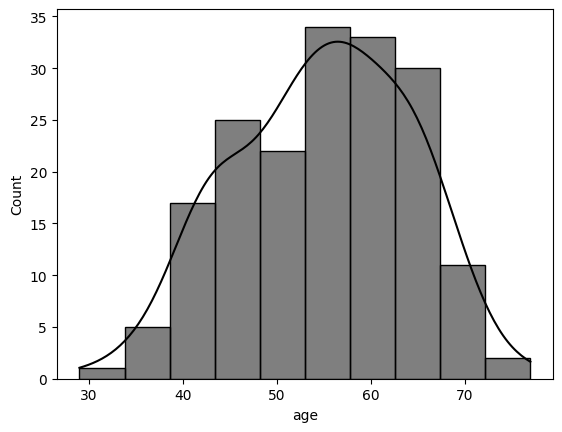

In [ ]:
# Distribution of Age
sns.histplot(mydata['age'],kde=True,color='black')
plt.show()



* Most patients are between 50 and 65 years old, with the highest concentration around 55–60 years, as shown by the tallest bars and the KDE peak.There are fewer younger patients (below 40) and fewer older patients (above 70).
* Overall, the distribution follows a nearly normal (bell-shaped) pattern, indicating ages are fairly centered around middle age.

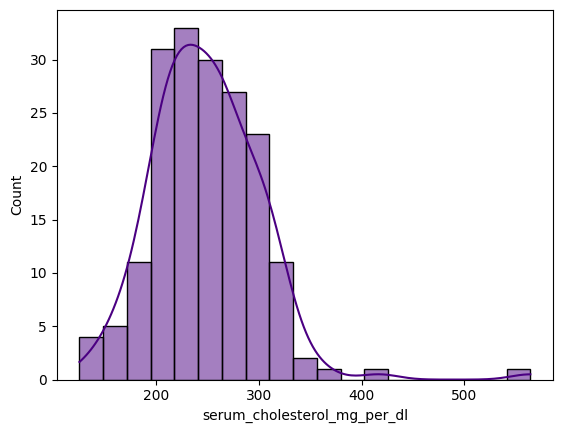

In [ ]:
# Distribution of Cholesterol
sns.histplot(mydata['serum_cholesterol_mg_per_dl'],kde=True,color='indigo')
plt.show()

*   This histogram shows the distribution of serum cholesterol levels among patients.
*  Most values fall between 200 and 300 mg/dl, with a peak around 230–260 mg/dl, as shown by the tallest bars and KDE curve.
A few patients have very high cholesterol levels (above 400 mg/dl), indicating the presence of outliers.
*  Overall, the distribution is slightly right-skewed, meaning higher cholesterol values occur but less frequently.




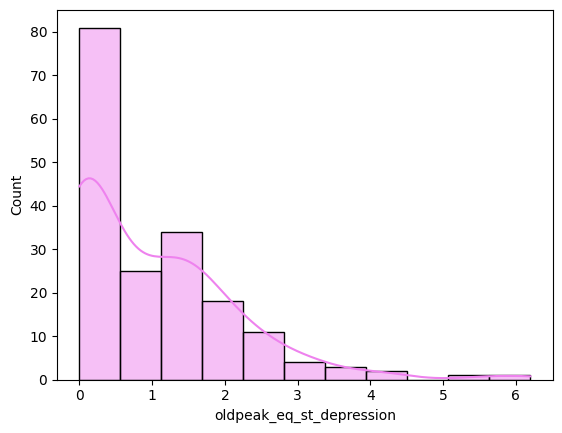

In [ ]:
# Distribution of Oldpeak Depression
sns.histplot(mydata['oldpeak_eq_st_depression'],kde=True,color='violet')
plt.show()



*   This histogram shows the distribution of the ST depression induced by exercise (oldpeak_eq_st_depression).
*   Most values are close to 0, meaning many patients show little or no ST depression.As values increase, the number of patients decreases steadily, with only a few having high depression values above 3–6.
* The KDE curve reflects a right-skewed distribution, indicating that higher depression levels are rare compared to lower values.  






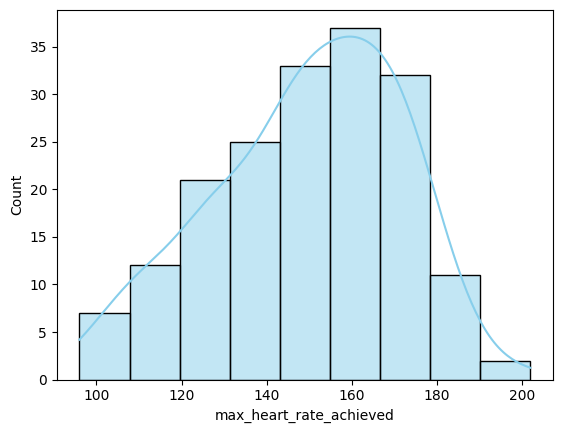

In [ ]:
# Distribution of Max heart rate
sns.histplot(mydata['max_heart_rate_achieved'],kde=True,color='skyblue')
plt.show()


*   This histogram shows the distribution of the maximum heart rate achieved by patients.

*   Most values fall between 130 and 175 beats per minute, with the highest concentration around 150–165, as indicated by the peak in both the bars and KDE curve.Fewer patients achieved very low (below 110) or very high (above 190) heart rates.
*   Overall, the distribution is close to a normal (bell-shaped) curve, centered around mid-to-high heart rate values.






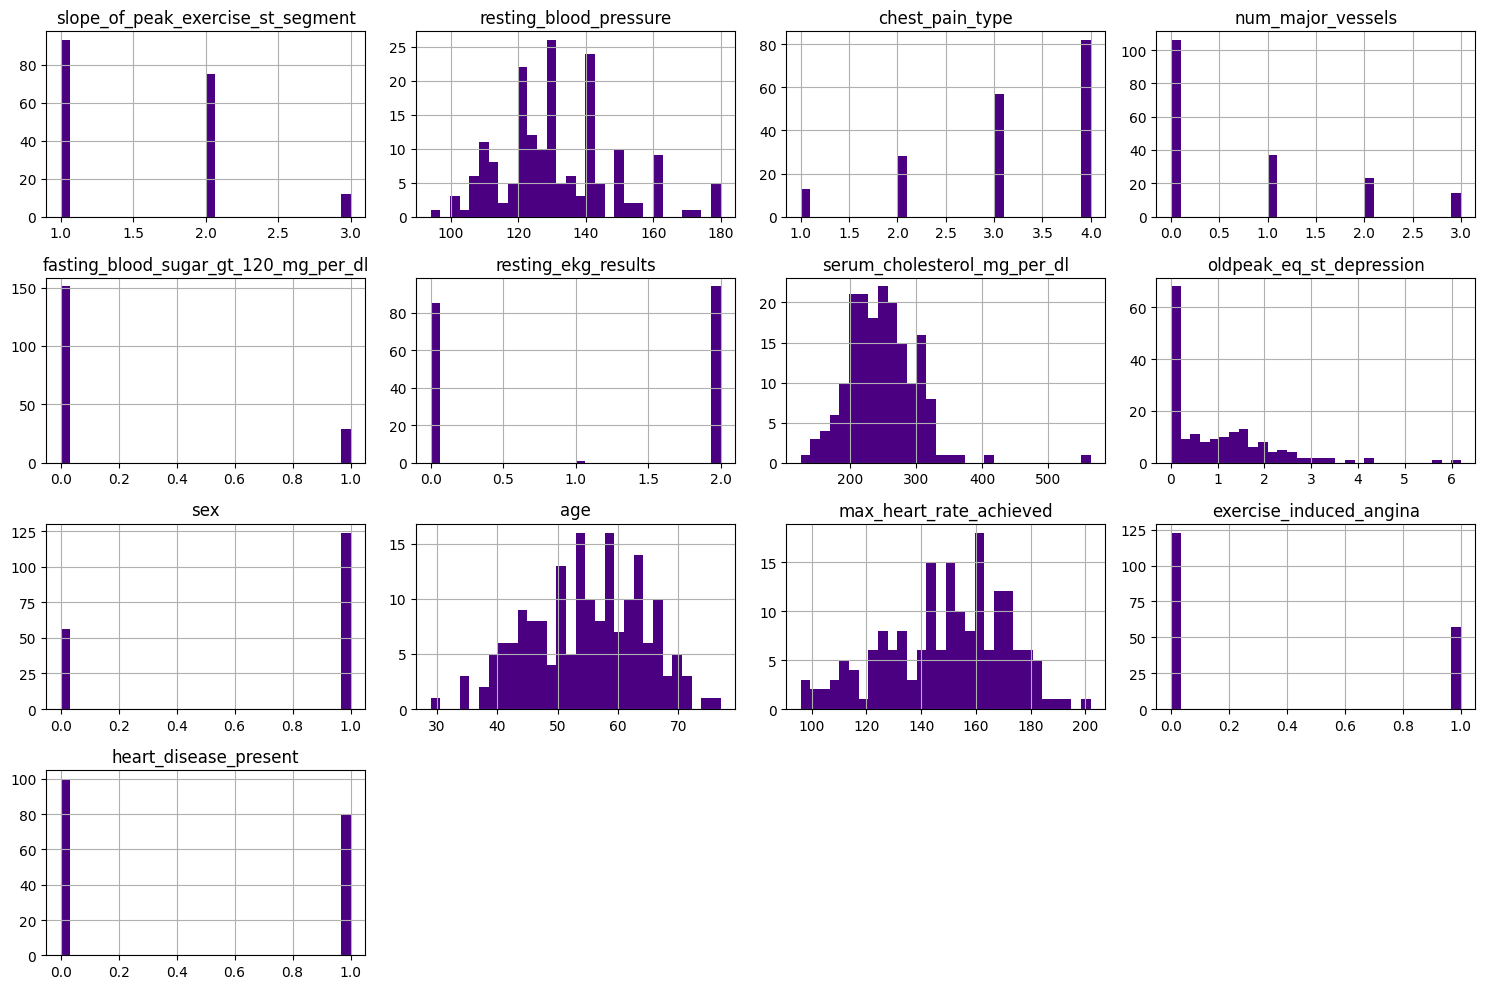

In [ ]:
mydata.hist(figsize=(15,10), bins=30,color='indigo')
plt.tight_layout()
plt.show()

## Pie chart

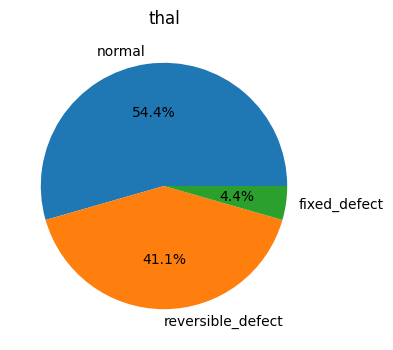

In [ ]:
# Distribution of thal
counts = mydata['thal'].value_counts()

# Pie chart
counts.plot.pie(autopct='%1.1f%%', figsize=(4,4))
plt.title("thal")
plt.ylabel("")   # removes the default y-label
plt.show()



*   This pie chart shows the distribution of the thal feature.

*  The largest portion, 54.4%, represents patients with a normal thalassemia test result.About 41.1% of patients fall into the reversible defect category, indicating an abnormal but reversible heart condition.The smallest group, 4.4%, has a fixed defect, meaning a permanent abnormality.
*  Overall, the chart shows that most patients have normal results, while only a small percentage have severe fixed defects.








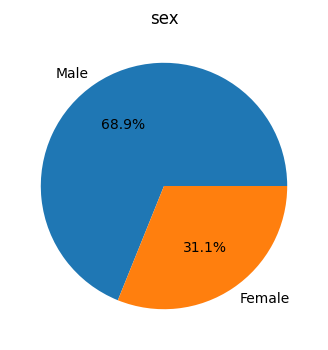

In [ ]:
# Distribution of sex
counts = mydata['sex'].value_counts()

# Pie chart
counts.plot.pie(autopct='%1.1f%%', figsize=(4,4),labels=['Male','Female'])
plt.title("sex")
plt.ylabel("")   # removes the default y-label
plt.show()




*   This pie chart represents the distribution of the sex variable in the dataset.
* The majority of patients are male, making up 68.9% of the total.
Females account for 31.1%, which is significantly smaller compared to males.
*   Overall, the chart shows that the dataset is male-dominated, indicating a higher number of male patients in this heart disease study.

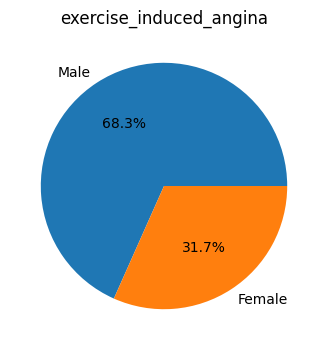

In [ ]:
# Distribution of exercise induced angina
counts = mydata['exercise_induced_angina'].value_counts()

# Pie chart
counts.plot.pie(autopct='%1.1f%%', figsize=(4,4),labels=['Male','Female'])
plt.title("exercise_induced_angina")
plt.ylabel("")   # removes the default y-label
plt.show()




*   This pie chart represents the distribution of the exercise-induced angina feature in the dataset.68.3% of individuals do not experience angina during exercise (represented by the first category).31.7% of individuals do experience angina during exercise.
* Overall, the chart shows that a majority of patients do not develop chest pain during physical activity, while about one-third are affected, which could be relevant for heart disease analysis.

## Bi Variate Analysis

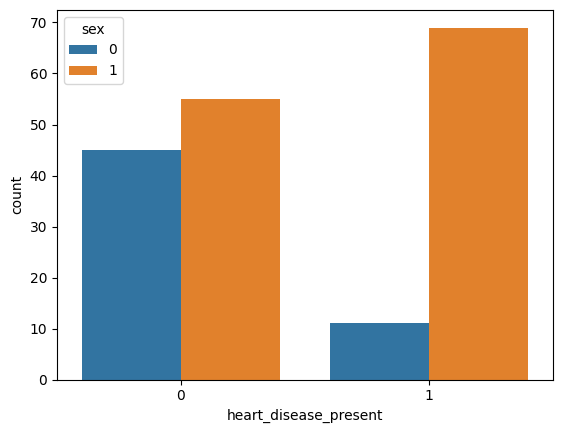

In [ ]:
# Countplot of the heart disease by sex
sns.countplot(x="heart_disease_present", data=mydata, hue="sex")
plt.show()


*   Males have a significantly higher prevalence of heart disease compared to females in this dataset.
*  Females are more concentrated in the no heart disease category.
*  Sex appears to be a strongly associated factor with heart disease presence.

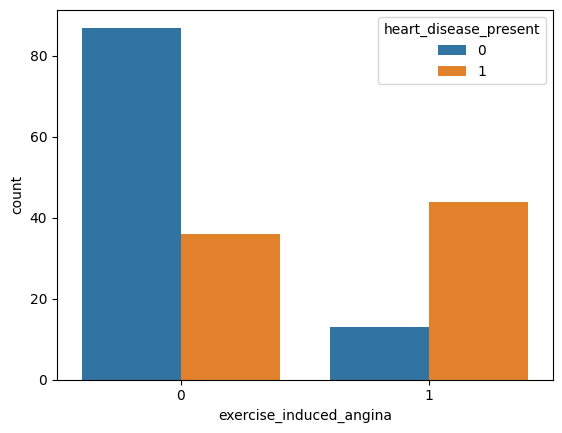

In [ ]:
# Countplot of Exercise Angina vs Heart Disease
sns.countplot(x='exercise_induced_angina', hue='heart_disease_present', data=mydata)
plt.show()

*   There is a strong positive association between exercise-induced angina and heart disease.
*   Patients experiencing chest pain during exercise are much more likely to have heart disease.
*  This variable is a highly informative clinical feature.

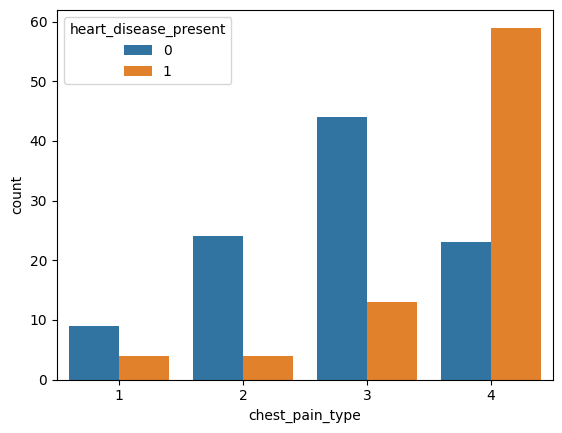

In [ ]:
#Countplot of Chest Pain Type vs Heart Disease
sns.countplot(x='chest_pain_type', hue='heart_disease_present', data=mydata)
plt.show()


*   Chest pain type shows a clear gradient of risk.
*   Types 1 and 2 are generally associated with lower risk.
*   Type 3 represents a mixed or intermediate risk group.
*  Type 4 chest pain is highly associated with heart disease.






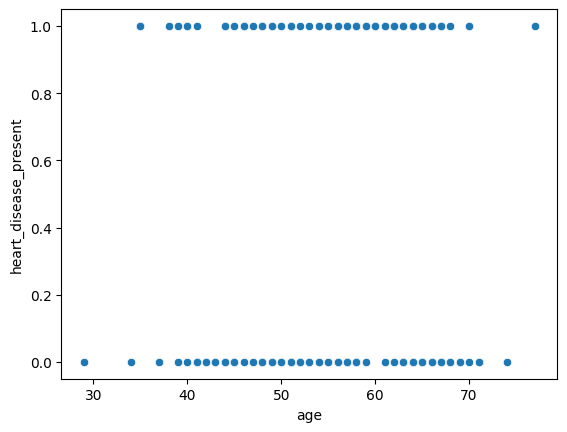

In [ ]:
# Distribution of Age and Heart disease present
sns.scatterplot(x='age',y='heart_disease_present',data=mydata)
plt.show()



*   This scatter plot shows the relationship between age and whether heart disease is present (0 = no, 1 = yes).The points are separated into two horizontal lines because the target is binary.
*   Heart disease cases (value 1) appear across many age groups, especially between 40 and 70 years, indicating that heart disease is common in middle-aged and older patients.
*   Individuals without heart disease (value 0) also span a similar age range, but there seems to be a slightly higher density of positive cases in older ages.
*   Overall, the graph suggests that heart disease tends to increase with age, but it can still occur at various ages.







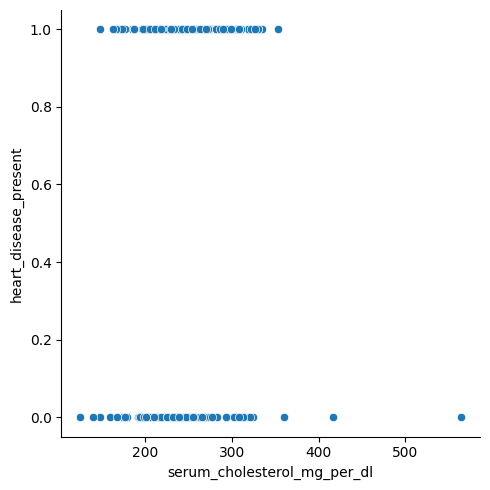

In [ ]:
sns.relplot(x='serum_cholesterol_mg_per_dl',y='heart_disease_present',data=mydata)
plt.show()

*   This scatter plot shows the relationship between serum cholesterol levels and whether heart disease is present (0 = no, 1 = yes).The points are split into two horizontal lines because the target variable is binary.
*   There is no clear separation between cholesterol levels of patients with and without heart disease — both groups show a similar spread across cholesterol values ranging roughly from 150 to 350 mg/dl, with a few outliers above 400 mg/dl.
*   Overall, the graph suggests that serum cholesterol alone does not strongly distinguish heart disease presence, meaning it may not be a decisive predictor by itself.

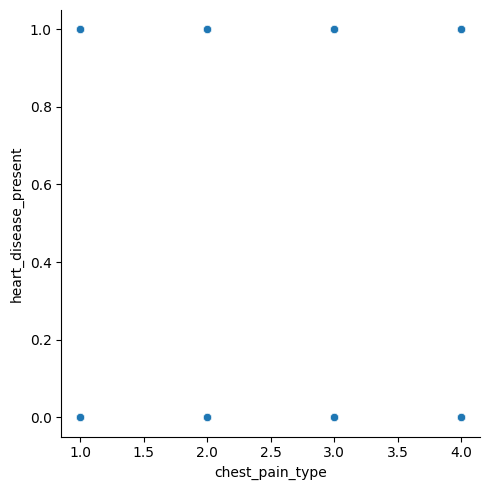

In [ ]:
sns.relplot(x='chest_pain_type',y='heart_disease_present',data=mydata)
plt.show()

*   This scatter plot shows the relationship between chest pain type and whether heart disease is present (0 = no, 1 = yes).Each chest pain category has points along both outcomes, but the distribution reveals a pattern:
*   Higher chest pain types (3 and 4) show more points associated with heart disease (value 1).
*   Lower chest pain types (1 and 2) have more points at 0, meaning no heart disease.
*    Overall, the graph suggests that certain chest pain types—especially the higher numbered ones—are more strongly associated with heart disease, making chest pain type an important predictive feature.

# Multi Variate Analysis

In [ ]:
sns.pairplot(mydata)
plt.show()


# Correlation Heatmap

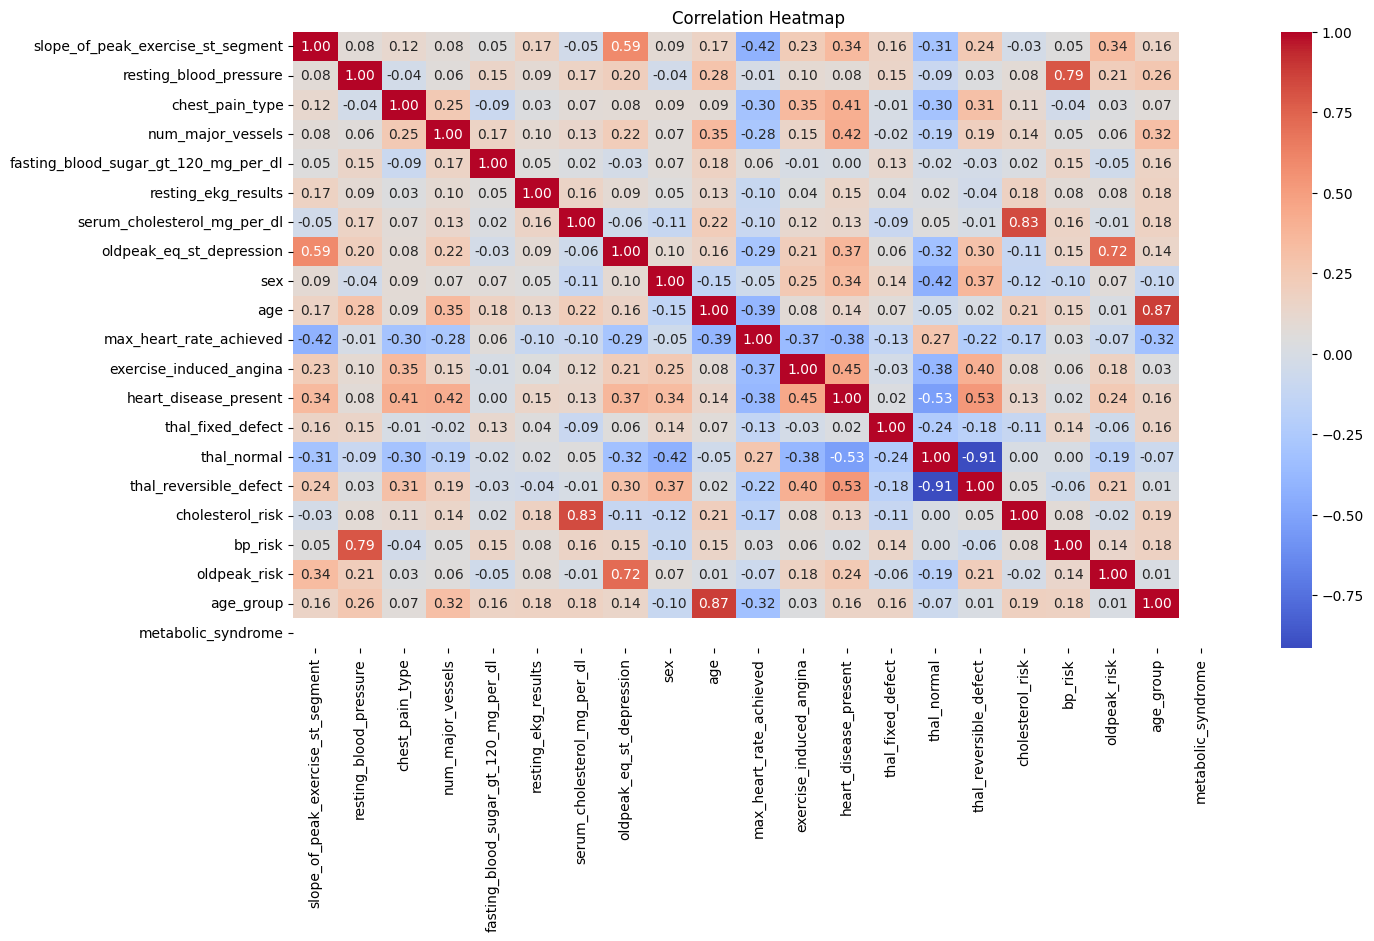

In [185]:
num_cols = mydata.select_dtypes(include=['int64','float64'])
corr = num_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

 **Correlation Heatmap Summary :**

* This heatmap shows how strongly different numerical features in the heart disease dataset are related to each other and to the target variable heart_disease_present.

 **Strong Predictors of Heart Disease:**

* The features most strongly correlated with the presence of heart disease are:

* exercise_induced_angina (0.45)

* num_major_vessels (0.42)

* chest_pain_type (0.41)

* oldpeak_eq_st_depression (0.38)

* These features show a moderate positive correlation, meaning higher values of these variables increase the likelihood of heart disease.

 **There is also a noticeable negative correlation between:**

* max_heart_rate_achieved (-0.38)

* Meaning patients who achieve lower maximum heart rate during exercise are more likely to have heart disease.

 **Relationships Between Features:**

* slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression (-0.62) have a strong negative correlation, indicating that when ST depression increases, slope tends to decrease.

* Most other feature pairs show weak correlations (values close to 0), meaning they don't strongly influence each other.

 **Overall Interpretation :**
* The heatmap highlights a few key features — especially angina, chest pain type, ST depression, number of major vessels, and max heart rate achieved — as meaningful predictors of heart disease.
*  Most other variables have weak relationships, suggesting they may contribute less to prediction.

In [ ]:
mydata

# Feature Engineering

## One Hot Encoding

In [ ]:
mydata = pd.get_dummies(mydata, columns=['thal'])


In [ ]:
mydata

In [ ]:
mydata

In [ ]:
mydata.drop(columns=['patient_id'], inplace=True)

In [ ]:
mydata

In [ ]:
mydata = mydata.astype(int)

In [ ]:
mydata

# Checking outliers

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in mydata.drop('heart_disease_present',axis=1):
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=mydata[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [ ]:
num_cols = mydata.select_dtypes(include=['int64', 'float64']).columns

total_rows = len(mydata)

for col in num_cols:
    Q1 = mydata[col].quantile(0.25)
    Q3 = mydata[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = mydata[(mydata[col] < (Q1 - 1.5 * IQR)) |
                      (mydata[col] > (Q3 + 1.5 * IQR))]

    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_rows) * 100

    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")


In [ ]:
features = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl']

for col in features:
    Q1 = mydata[col].quantile(0.25)
    Q3 = mydata[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {col}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    # Outlier values
    outliers = mydata[(mydata[col] < lower_bound) | (mydata[col] > upper_bound)][col]
    print(f"Number of outliers: {outliers.count()}")
    print(outliers)

## Applying Winsorization

In [ ]:
cols_to_winsorize = [
    'serum_cholesterol_mg_per_dl',
    'resting_blood_pressure'
]
for col in cols_to_winsorize:
    mydata[col] = winsorize(mydata[col], limits=(0, 0.05))  # only upper limit capping

print(mydata[cols_to_winsorize].describe())

In [ ]:
# Scaling
scaler = RobustScaler()
mydata[cols_to_winsorize] = scaler.fit_transform(mydata[cols_to_winsorize])


## Feature Engineering("Combining columns")

In [ ]:
# 1) Cholesterol risk category (0 = normal, 1 = borderline, 2 = high)
mydata['cholesterol_risk'] = pd.cut(
    mydata['serum_cholesterol_mg_per_dl'],
    bins=[0, 200, 240, 1000],     # strictly increasing, safe upper limit
    labels=[0, 1, 2],
    include_lowest=True
).astype('float').fillna(-1).astype(int)

# 2) Blood pressure risk category
mydata['bp_risk'] = pd.cut(
    mydata['resting_blood_pressure'],
    bins=[0, 120, 140, 300],      # strictly increasing
    labels=[0, 1, 2],
    include_lowest=True
).astype('float').fillna(-1).astype(int)

# 3) Oldpeak risk flag (1 = high ST depression)
mydata['oldpeak_risk'] = (mydata['oldpeak_eq_st_depression'] > 2).astype(int)

# 4) Age group (0 = young, 1 = middle, 2 = senior)
mydata['age_group'] = pd.cut(
    mydata['age'],
    bins=[0, 40, 55, 120],        # strictly increasing
    labels=[0, 1, 2],
    include_lowest=True
).astype('float').fillna(-1).astype(int)

# 5) Metabolic syndrome (high BP + high cholesterol)
mydata['metabolic_syndrome'] = (
    (mydata['cholesterol_risk'] == 2) &
    (mydata['bp_risk'] == 2)
).astype(int)


In [ ]:
mydata

## Logistic Regression

In [ ]:
X = mydata.drop(['heart_disease_present'],axis=1)
y=mydata['heart_disease_present']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_prob=clf.predict_proba(X_test)

In [ ]:
y_pred_prob

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

#Random Forest

In [ ]:
X = mydata.drop(['heart_disease_present'],axis=1)
y=mydata['heart_disease_present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Model Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.8611111111111112


## XGBoost

In [ ]:
X = mydata.drop('heart_disease_present', axis=1)
y = mydata['heart_disease_present']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)


print("\nClassification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [ ]:
# Model Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)


print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



## CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.03,
    verbose=0
)

cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


CatBoost Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



## LightGBM

In [ ]:
# create model
lgb_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=-1,        # -1 means no fixed limit, let LGBM decide
    num_leaves=31,       # typical default, can tune later
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# train
lgb_model.fit(X_train, y_train)

# predict
y_pred = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 64, number of negative: 80
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223144
[LightGBM] [Info] Start training from score -0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
# Model Tuning
param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.03, 0.05],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_lgb = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lgb.fit(X_train, y_train)

print("Best params:", grid_lgb.best_params_)

best_lgb = grid_lgb.best_estimator_
y_pred = best_lgb.predict(X_test)

print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 64, number of negative: 80
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223144
[LightGBM] [Info] Start training from score -0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

## Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scale -> SVM
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



## KNN

In [ ]:
knn_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))   # default k = 5
])

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.8611111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [ ]:
# Model Tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # 1 = Manhattan, 2 = Euclidean
}

grid_knn = GridSearchCV(
    knn_clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

print("Best params:", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred = best_knn.predict(X_test)

print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best params: {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'uniform'}
Tuned KNN Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



In [ ]:
new_person = {
    'slope_of_peak_exercise_st_segment': 1,   # abnormal slope (high risk)
    'resting_blood_pressure': 170,            # high BP
    'chest_pain_type': 3,                     # typical angina (worst category)
    'num_major_vessels': 2,                   # more vessels involved → higher risk
    'fasting_blood_sugar_gt_120_mg_per_dl': 1,
    'resting_ekg_results': 2,                 # abnormal ECG
    'serum_cholesterol_mg_per_dl': 270,       # high cholesterol
    'oldpeak_eq_st_depression': 3.5,          # severe ST depression
    'sex': 0,                                 # male (higher risk group)
    'age': 63,                                # older age → higher risk
    'max_heart_rate_achieved': 185,           # Added missing feature with a placeholder value
    'exercise_induced_angina': 1,             # Added missing feature with a placeholder value

    # categorical encoded thal values (use your dataset encoding)
    'thal_fixed_defect': 0,
    'thal_normal': 0,
    'thal_reversible_defect': 1,             # reversible defect = high risk

    # engineered features (based on rules)
    'cholesterol_risk': 1,     # high
    'bp_risk': 2,              # high
    'oldpeak_risk': 1,         # >2 threshold
    'age_group': 2,            # senior
    'metabolic_syndrome': 1    # yes
}
new_df = pd.DataFrame([new_person])

# Define feature_names from the training data columns
feature_names = X.columns.tolist()

new_df = new_df[feature_names]

pred = cat.predict(new_df)[0]
probs = cat.predict_proba(new_df)[0]
confidence = probs[pred] * 100

if pred == 1:
    print("Prediction: Person HAS Heart Disease")
else:
    print("Prediction: Person does NOT have Heart Disease")

print("Model Confidence:", round(confidence, 2), "%")
print("Probabilities -> No Disease:", round(probs[0]*100, 2), "% | Heart Disease:", round(probs[1]*100, 2), "%")

Prediction: Person HAS Heart Disease
Model Confidence: 79.71 %
Probabilities -> No Disease: 20.29 % | Heart Disease: 79.71 %


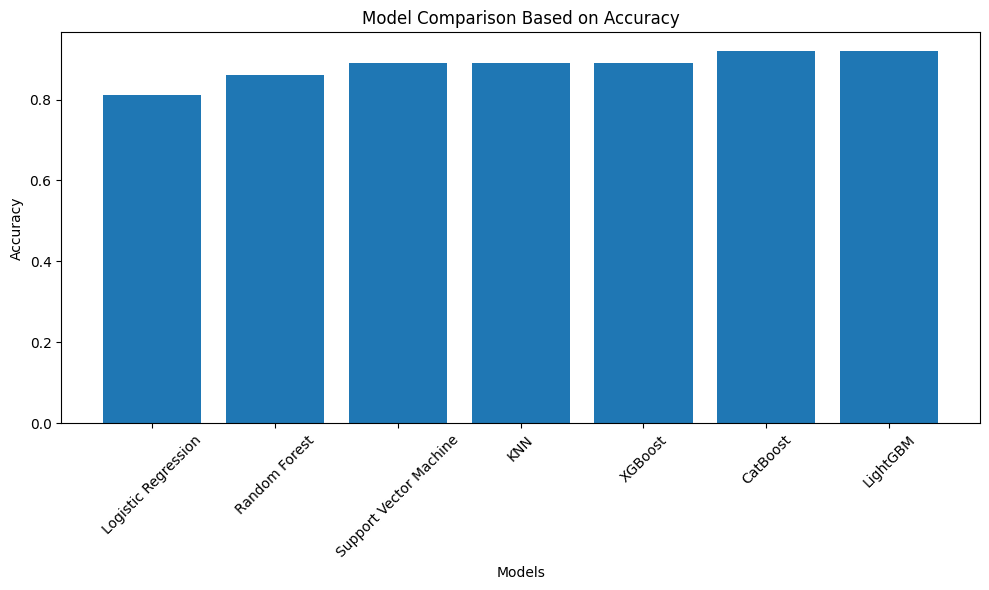

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your report data
report_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Support Vector Machine",
        "KNN",
        "XGBoost",
        "CatBoost",
        "LightGBM"
    ],
    "Accuracy": [0.81, 0.86, 0.89, 0.89, 0.89, 0.92, 0.92]
})

# Plot
plt.figure(figsize=(10,6))
plt.bar(report_df["Model"], report_df["Accuracy"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison Based on Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heart Disease Prediction - Project Report

**1. Conclusion**

In this project, patient health data was analyzed to predict the risk of heart disease using data analysis and machine learning techniques. Important features such as age, blood pressure, cholesterol, blood sugar, BMI, ECG results, and heart rate were studied through exploratory data analysis. After cleaning and preprocessing the data, predictive models were built and evaluated using performance metrics like accuracy, precision, recall, and F1-score. The final model was able to identify high-risk patients effectively. This project shows that data-driven prediction can help in early detection of heart disease, enabling timely medical intervention and reducing life-threatening situations.

**2. Suggestions to the Hospital to Improve Heart Disease Prediction and Prevent Life Threats**

**Accurate and Regular Data Collection**

Hospitals should maintain complete and accurate patient records including vital health parameters such as blood pressure, cholesterol, glucose level, BMI, and ECG results to improve prediction accuracy.

**Early Risk Identification Using Predictive Models**

Machine learning models should be used to identify high-risk patients at an early stage so that preventive care can be provided before the disease becomes critical.

**Continuous Monitoring of High-Risk Patients**

Patients predicted as high risk should be monitored regularly through follow-ups, ECG tests, and health checkups.

**Promote Preventive Healthcare**

Hospitals should guide patients on lifestyle changes such as healthy diet, regular exercise, quitting smoking, and stress management.

Regular Model Updates

Predictive models should be retrained with new patient data to improve accuracy and keep predictions reliable over time.

**3. Challenges Faced in Data and Techniques Used**

**Presence of Outliers**

Issue: Extreme values were observed in features like cholesterol, blood pressure, and BMI.

Technique Used: Box plots and IQR method for outlier detection and treatment.

Reason: Outliers can negatively affect model performance and accuracy.

**Feature Correlation**

Issue: Some features were highly correlated with each other.

Technique Used: Correlation heatmap analysis.

Reason: Helps identify redundant features and improves model interpretability.

**Model Selection**

Issue: Selecting the best algorithm for prediction.

Technique Used: Multiple models like Logistic Regression, and Random Forest were tested.

Reason: Comparing models ensures selection of the most accurate and reliable one.